In [1]:
import random

import numpy as np

In [2]:
np.random.seed(42)
points_a = np.random.uniform(-1000.0, 1000.0, size=(10 ** 5, 2))
points_b = np.random.uniform(-1 * (10 ** 14), 10 ** 14, size=(10 ** 5, 2))

In [3]:
np.random.seed(42)
num_points = 1000
R = 100

angles = np.random.uniform(0, 2 * np.pi, num_points)

x = R * np.cos(angles)
y = R * np.sin(angles)

points_c = np.column_stack((x, y))

In [4]:
a = np.array([-1.0, 0.0])
b = np.array([1.0, 0.1])

direction = b - a

num_points = 1000

t_values = np.random.uniform(-500.0, 500.0, num_points)

points_d = a + t_values[:, np.newaxis] * direction

In [5]:
from matplotlib import pyplot as plt

def plot_points(points_list, labels, title):
    num_plots = len(points_list)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))
    
    axes = axes.flatten() if num_rows > 1 else [axes]
    
    for i, (points, label) in enumerate(zip(points_list, labels)):
        axes[i].scatter(points[:, 0], points[:, 1], s=1, c='blue', label=label)
        axes[i].set_title(label)
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend()
    
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    plt.show()

In [6]:
labels = ['Points A', 'Points B', 'Points C', 'Points D']
points_list = [points_a, points_b, points_c, points_d]

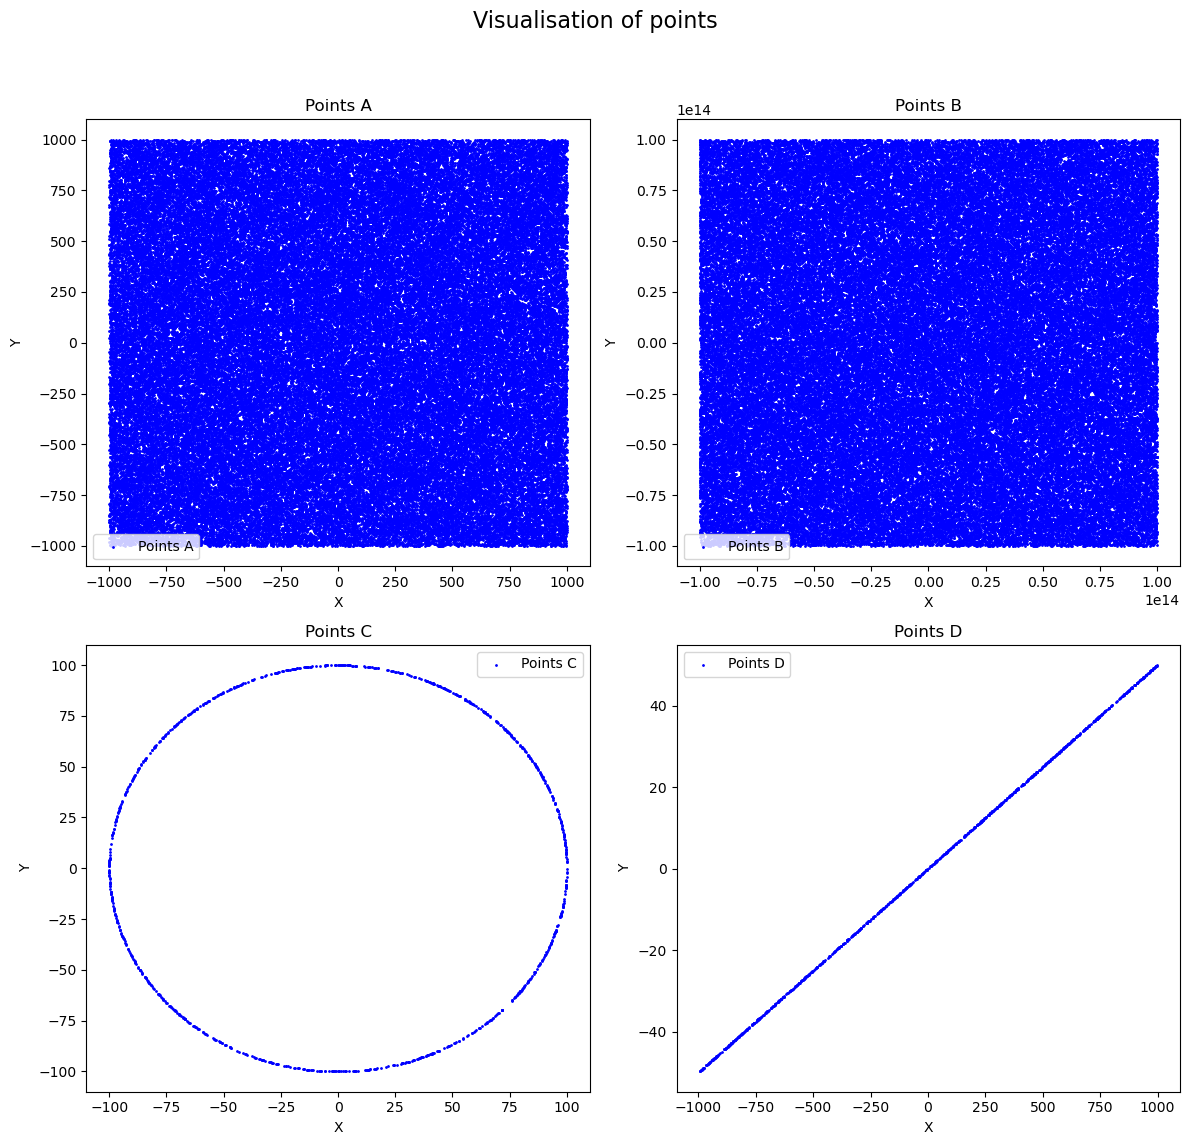

In [7]:
plot_points(points_list, labels, title='Visualisation of points')

In [8]:
def det3x3(point_a, point_b, point_c):
    det = point_a[0] * point_b[0] * 1
    det += point_a[1] * 1 * point_c[0]
    det += 1 * point_b[0] * point_c[1]
    det -= 1 * point_b[1] * point_c[0]
    det -= 1 * point_c[1] * point_a[0]
    det -= 1 * point_a[1] * point_b[0]
    return det

def det2x2(point_a, point_b, point_c):
    det = (point_a[0] - point_c[0]) * (point_b[1] - point_c[1])
    det -= (point_a[1] - point_c[1]) * (point_b[0] - point_c[0])
    return det

def det3x3_numpy(point_a, point_b, point_c):
    mat = np.array([np.hstack((point_a, 1)), 
                    np.hstack((point_b, 1)), 
                    np.hstack((point_c, 1))])
    return np.linalg.det(mat)

def det2x2_numpy(point_a, point_b, point_c):
    mat = np.array([(point_a[0] - point_c[0], point_a[1] - point_c[1]), 
                    (point_b[0]-point_c[0], point_b[1] - point_c[1])])
    return np.linalg.det(mat)

In [9]:
def classify_points(point_a, point_b, points, epsilon, det_fn):
    points_left = []
    points_collinear = []
    points_right = []
    for point in points:
        det = det_fn(point_a, point_b, point)
        if det >= -epsilon and det <= epsilon:
            points_collinear.append(point)
        elif det > epsilon:
            points_left.append(point)
        else:
            points_right.append(point)        
    points_left = np.array(points_left)
    points_collinear = np.array(points_collinear)
    points_right = np.array(points_right)
    return points_left, points_collinear, points_right

In [10]:
def draw_all(point_a, point_b, points, epsilons, det_fns, title, collinear_size):
    num_epsilons = len(epsilons)
    num_det_fns = len(det_fns)
    fig, axes = plt.subplots(num_epsilons, num_det_fns, 
                             figsize=(6 * num_det_fns, 6 * num_epsilons))
    axes = np.atleast_2d(axes)
    for i, epsilon in enumerate(epsilons):
        for j, det_fn in enumerate(det_fns):
            ax = axes[i, j]

            points_left, points_collinear, points_right = classify_points(point_a, point_b, 
                                                                          points, epsilon, det_fn)

            if len(points_left) > 0:
                ax.scatter(points_left[:, 0], points_left[:, 1], s=1, c='blue', 
                           label='On the left side')
            if len(points_collinear) > 0:
                ax.scatter(points_collinear[:, 0], points_collinear[:, 1], s=collinear_size,
                           c='green', label='Collinear')
            if len(points_right) > 0:
                ax.scatter(points_right[:, 0], points_right[:, 1], s=1, c='red', 
                           label='On the right side')
            
            ax.set_title(f"{title}\nEpsilon: {epsilon}, Det fn: {det_fn.__name__}")
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
    
    plt.tight_layout()
    
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

In [11]:
point_a = np.array([-1.0, 0.0])
point_b = np.array([1.0, 0.1])

In [12]:
epsilons = [0, 10**(-14), 10**(-12), 10**(-10), 10**(-8)]
det_fns = [det3x3, det2x2, det3x3_numpy, det2x2_numpy]

# Classification for points a

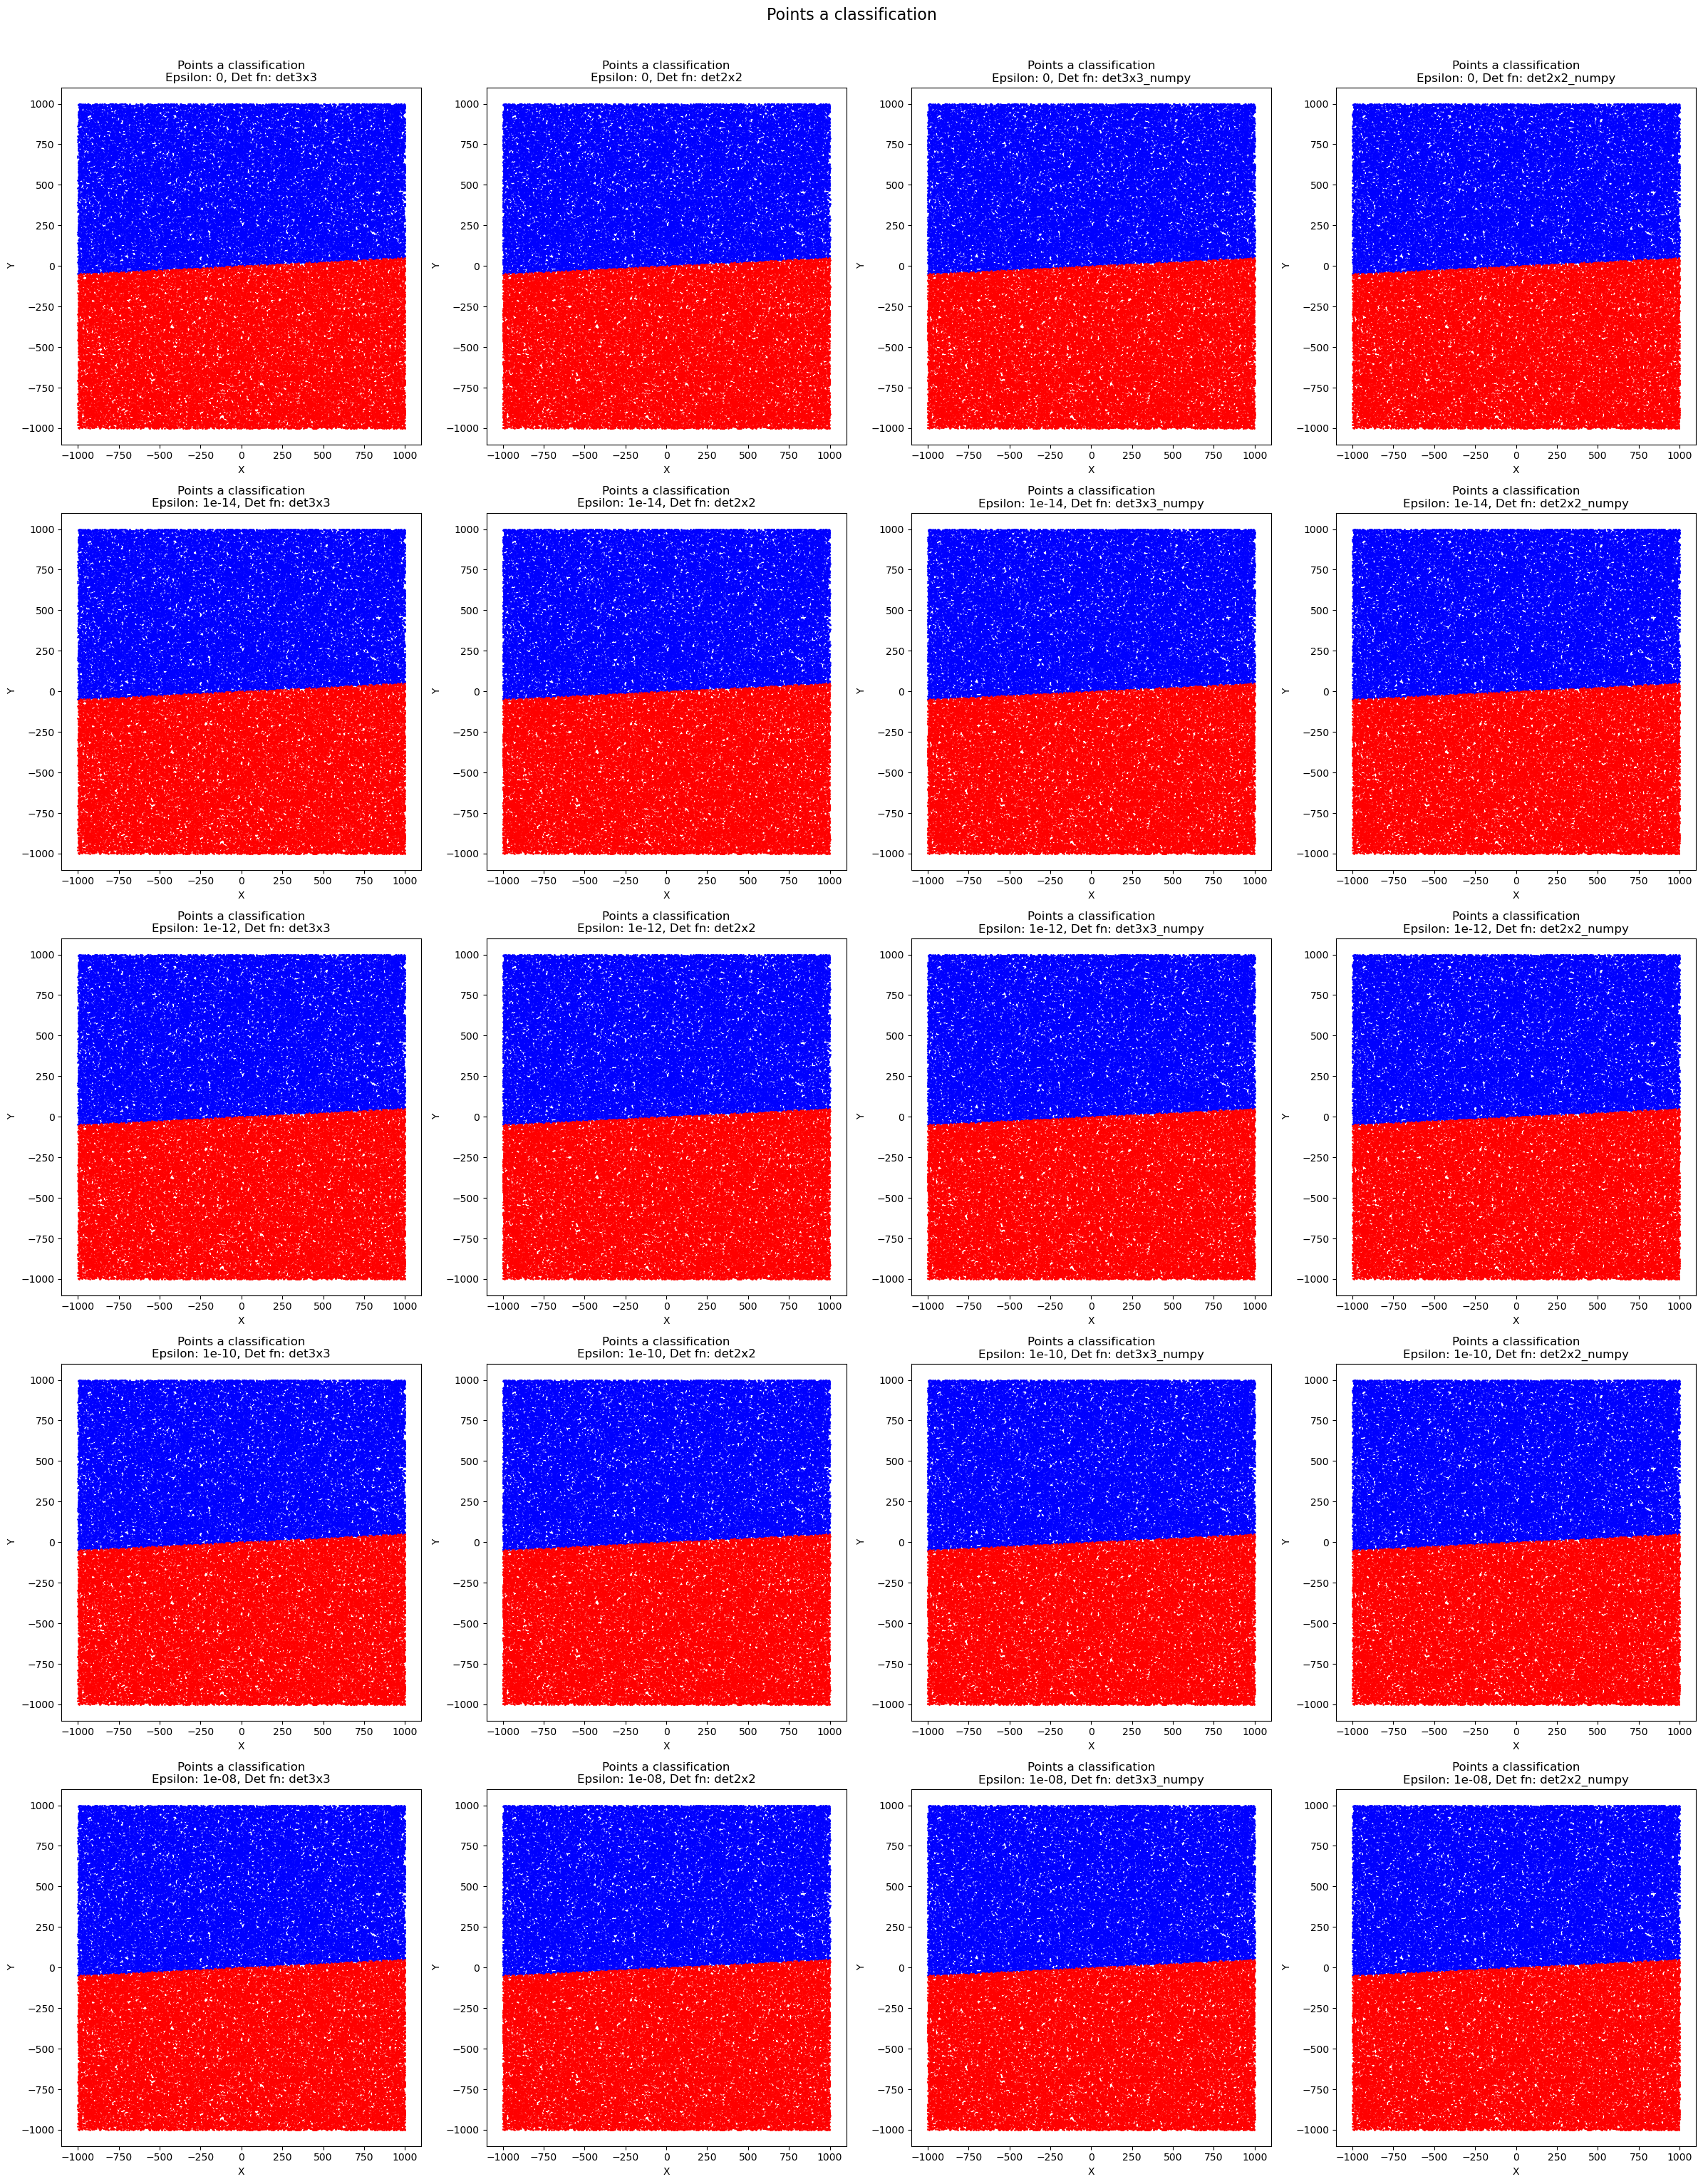

In [13]:
draw_all(point_a, point_b, points_a, epsilons=epsilons, det_fns=det_fns, 
         title="Points a classification", collinear_size=50)

# Classification for points b

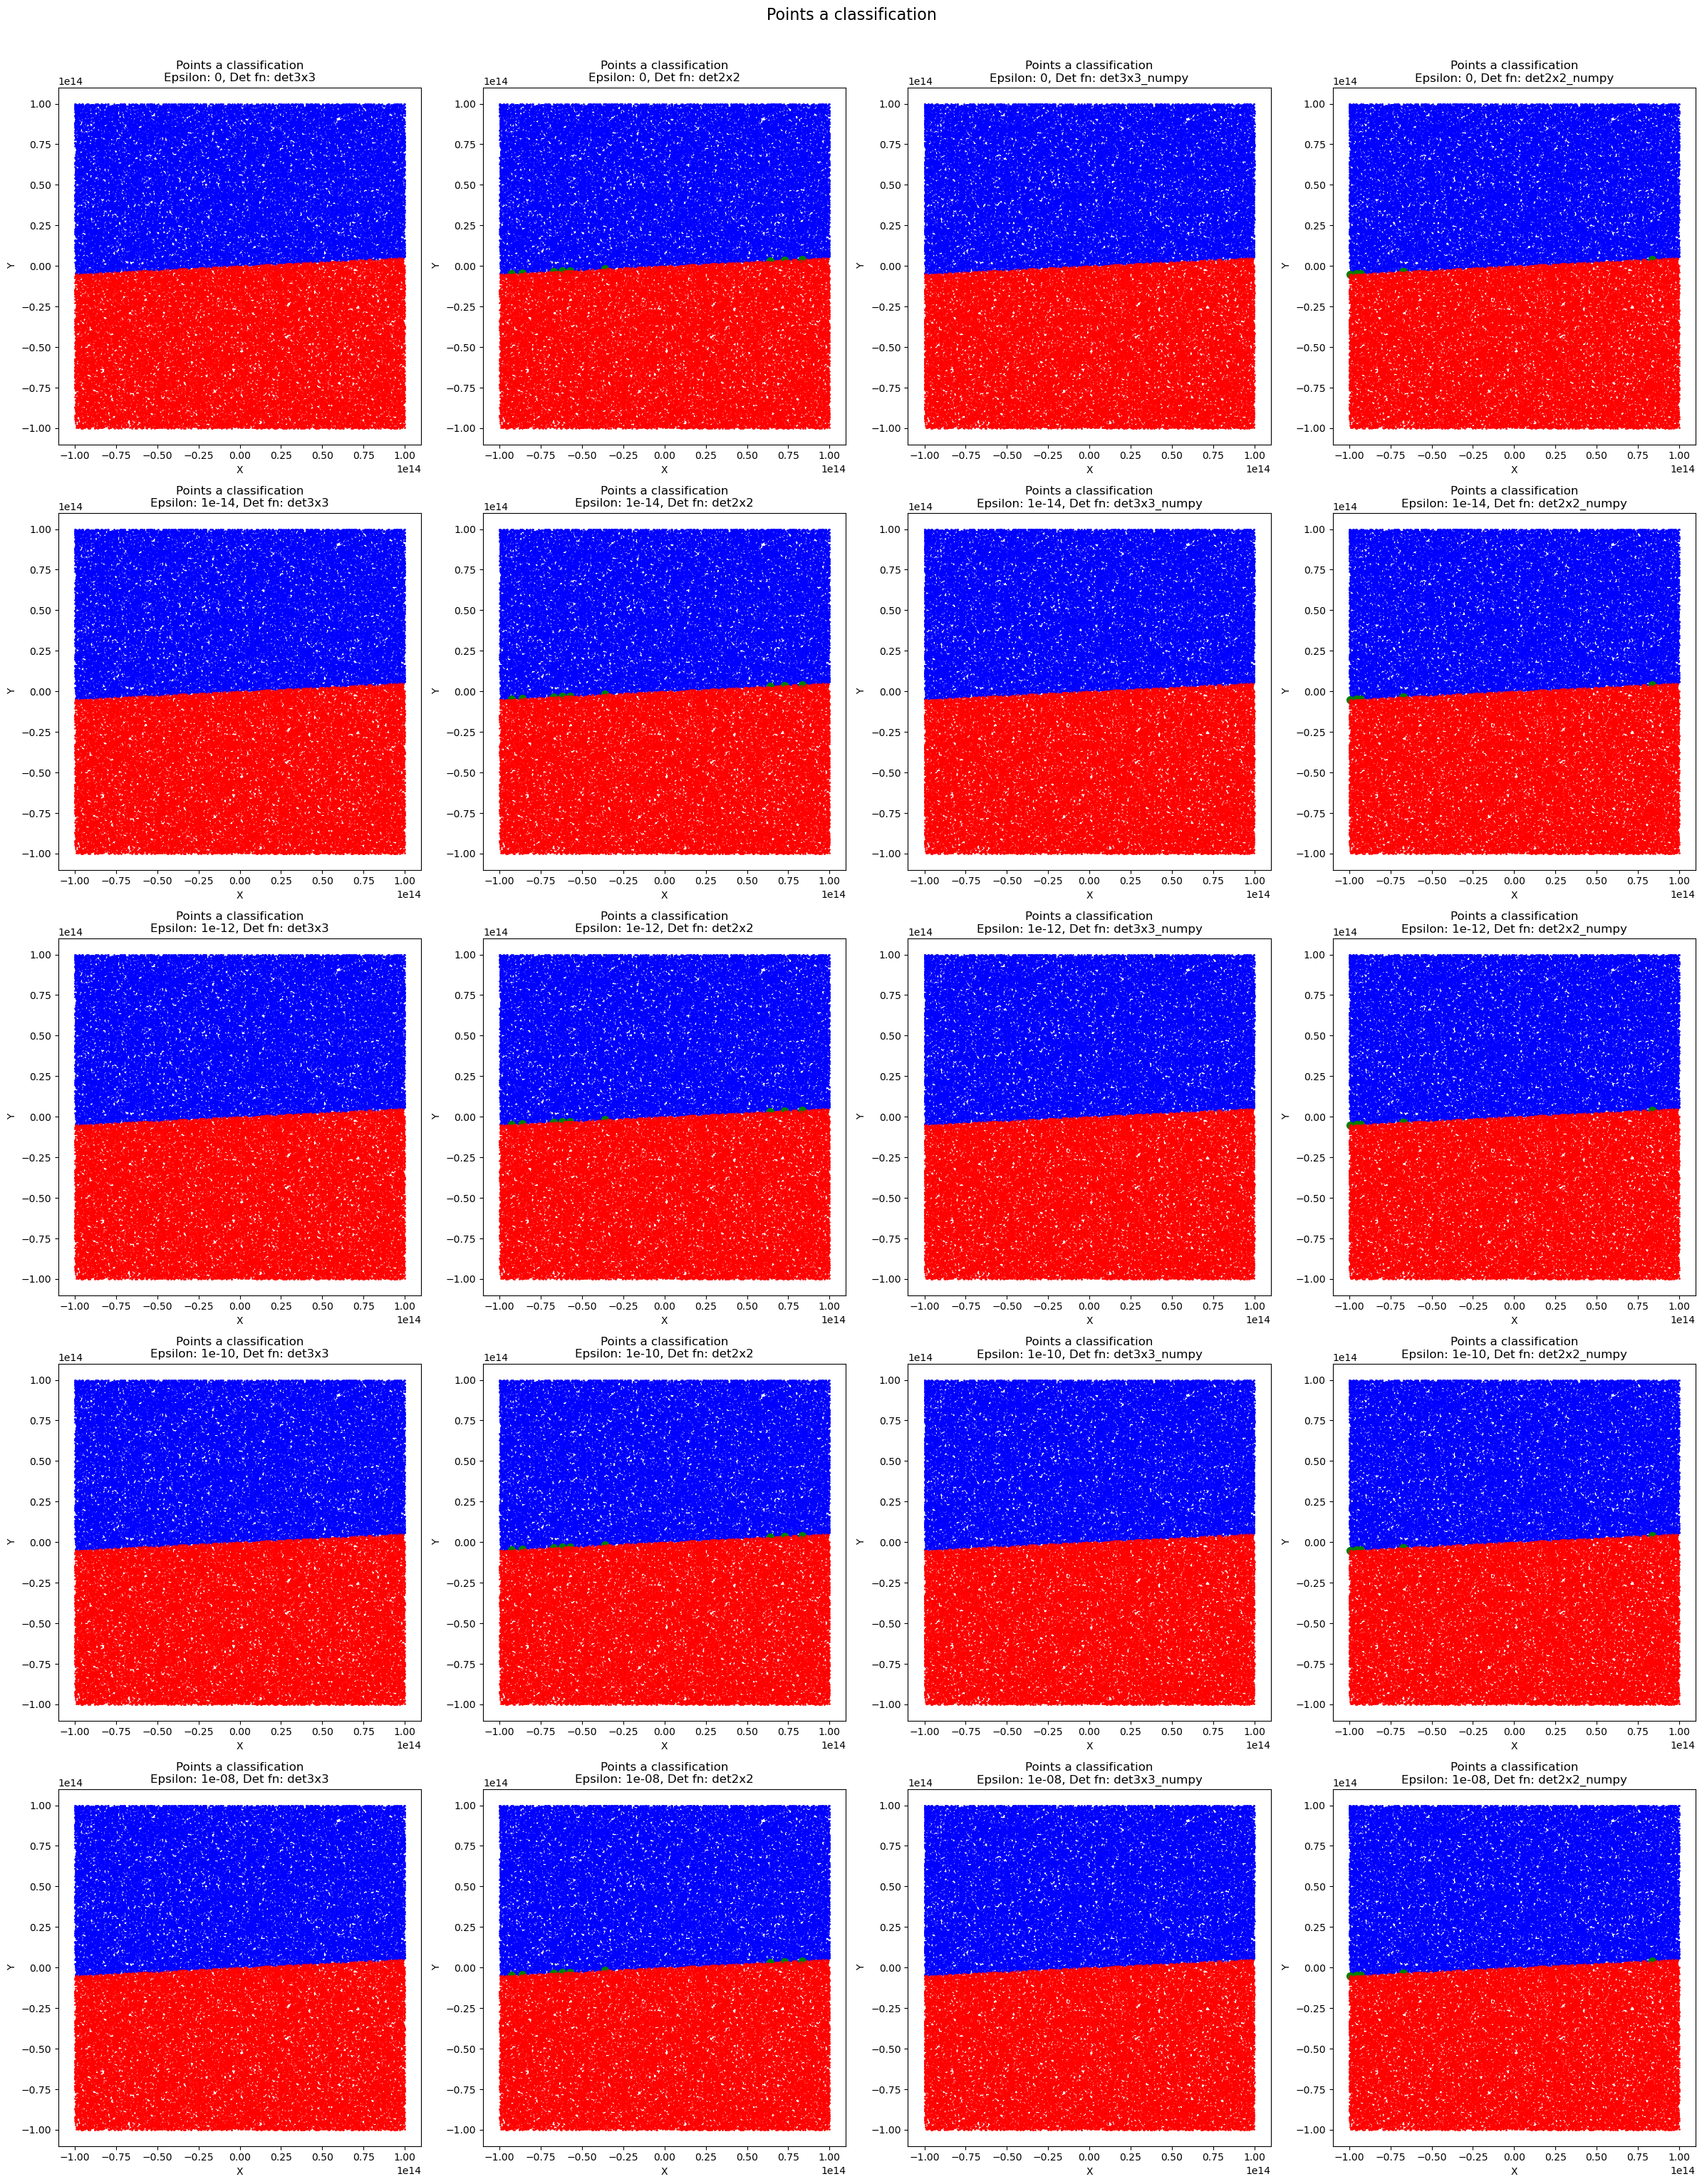

In [14]:
draw_all(point_a, point_b, points_b, epsilons=epsilons, det_fns=det_fns, 
         title="Points a classification", collinear_size=50)

# Classification for points c

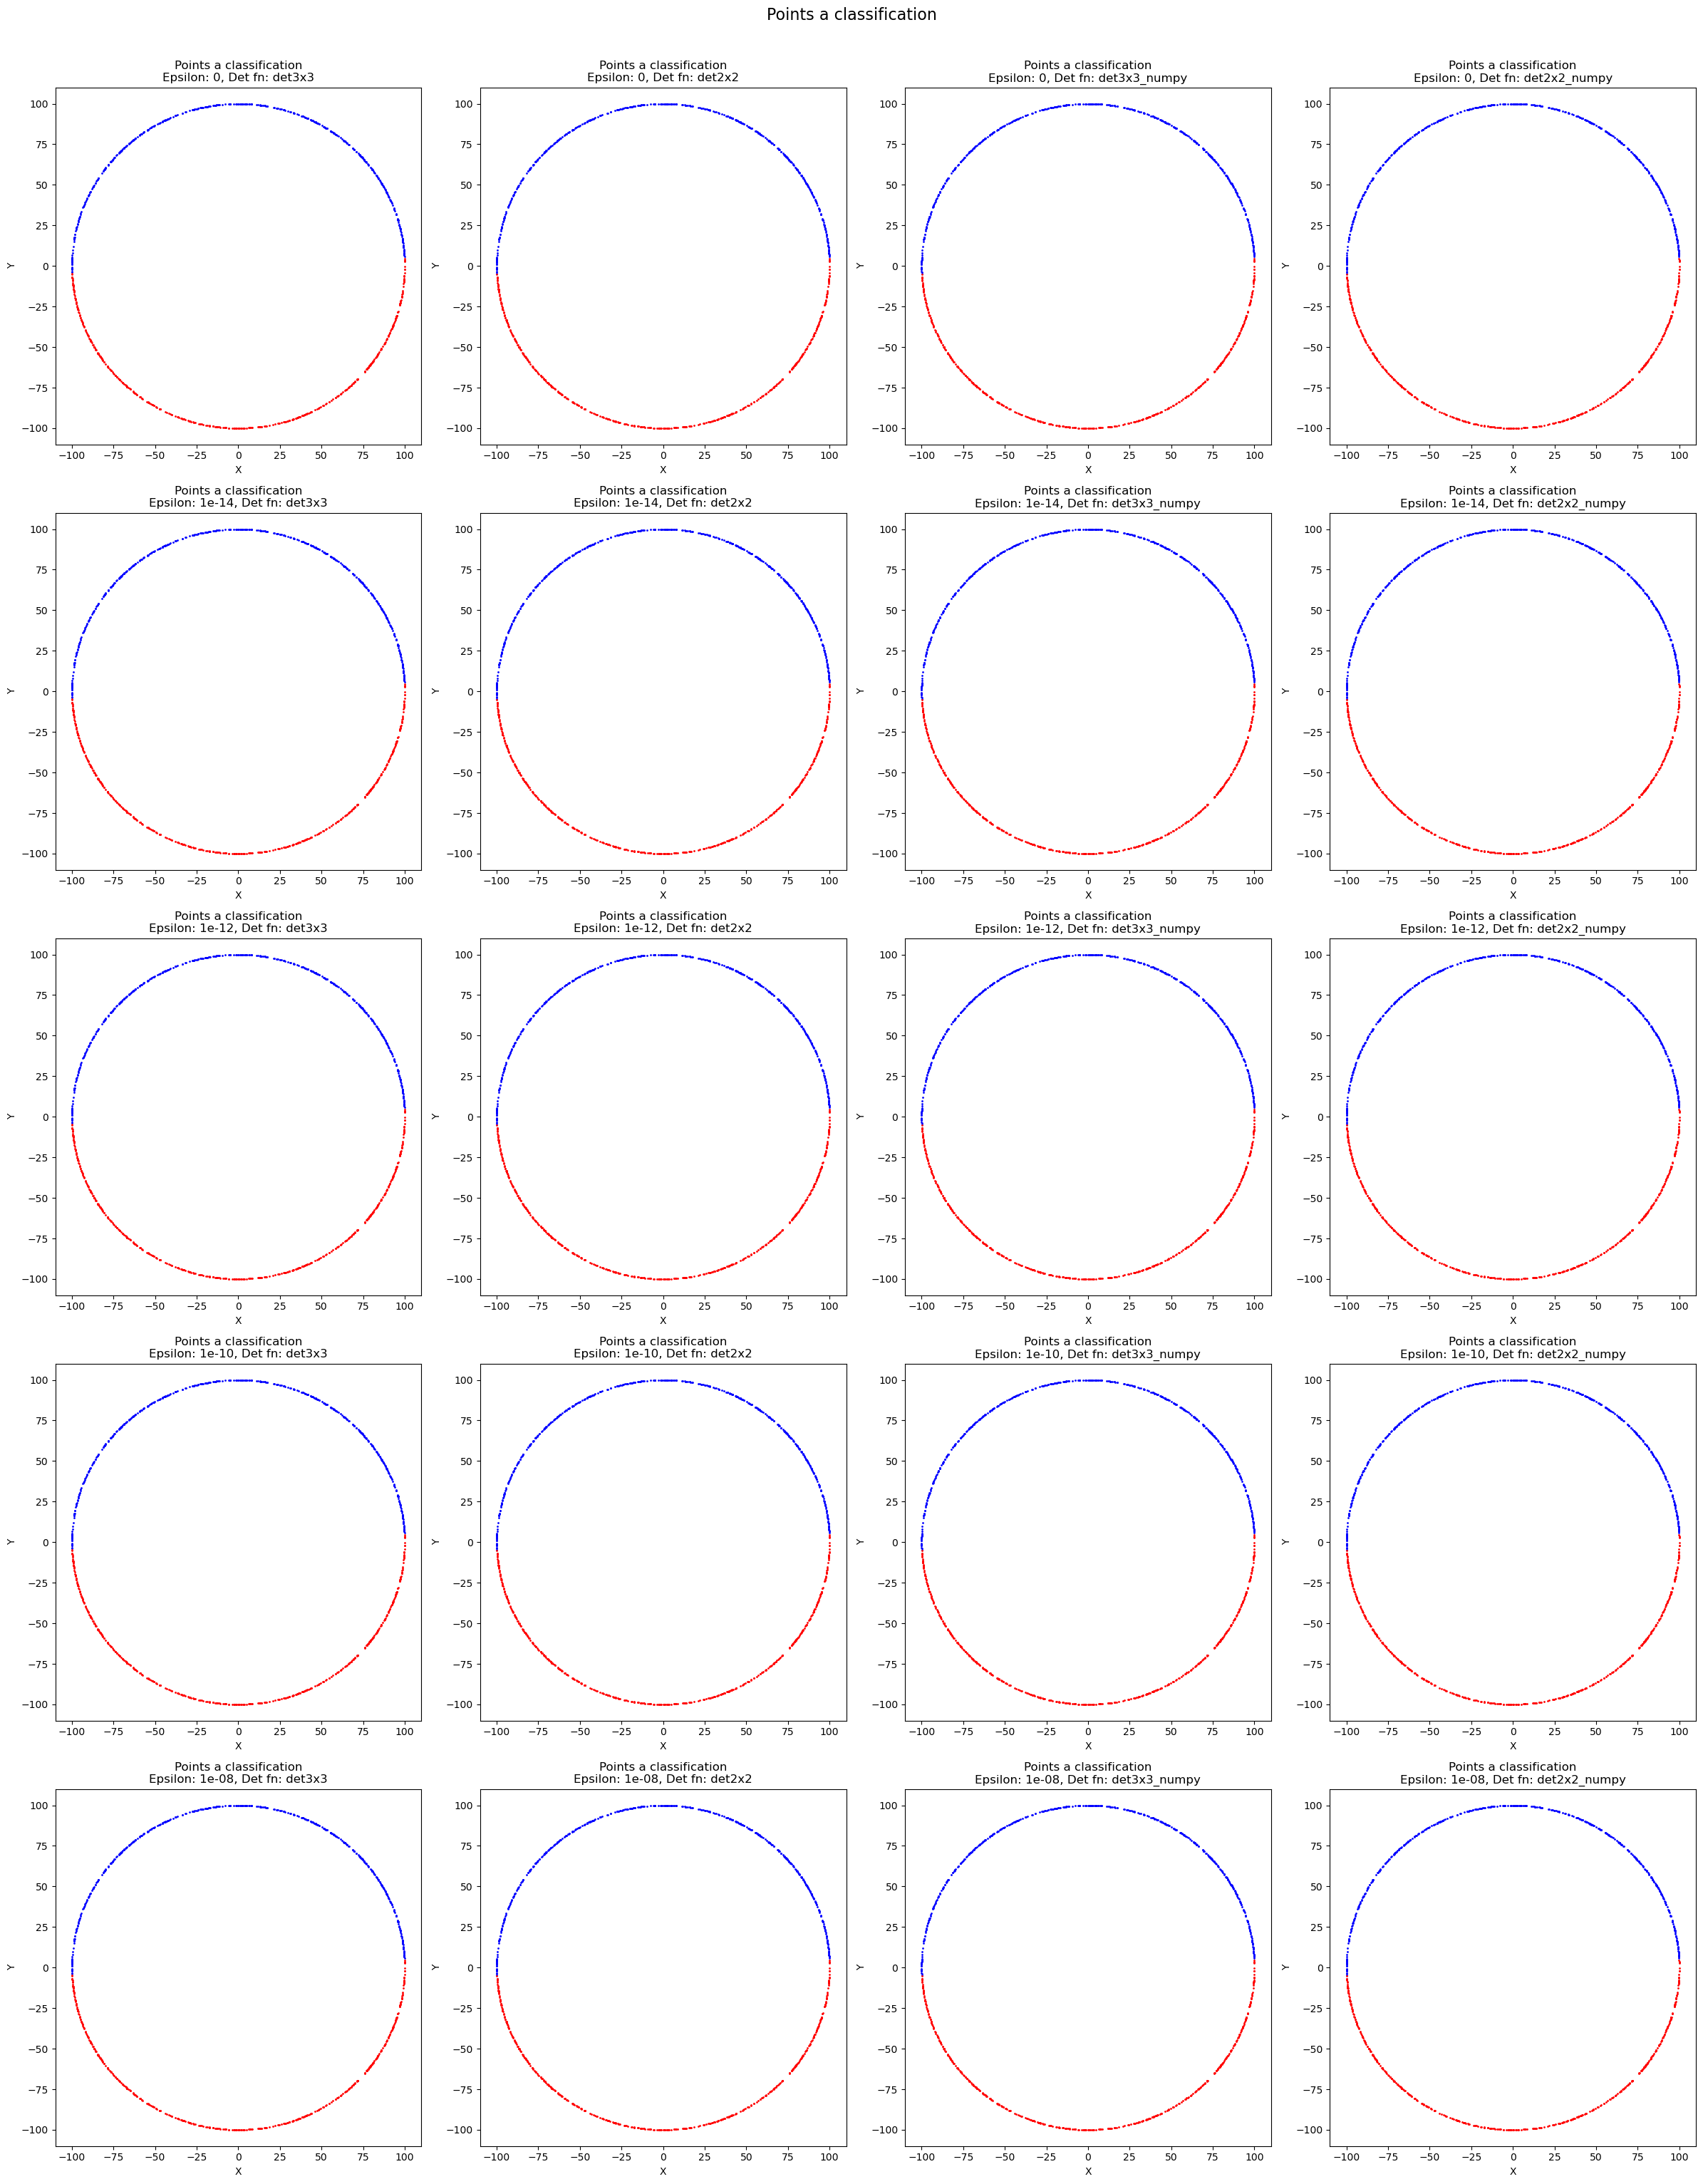

In [15]:
draw_all(point_a, point_b, points_c, epsilons=epsilons, det_fns=det_fns, 
         title="Points a classification", collinear_size=200)

# Classification for points d

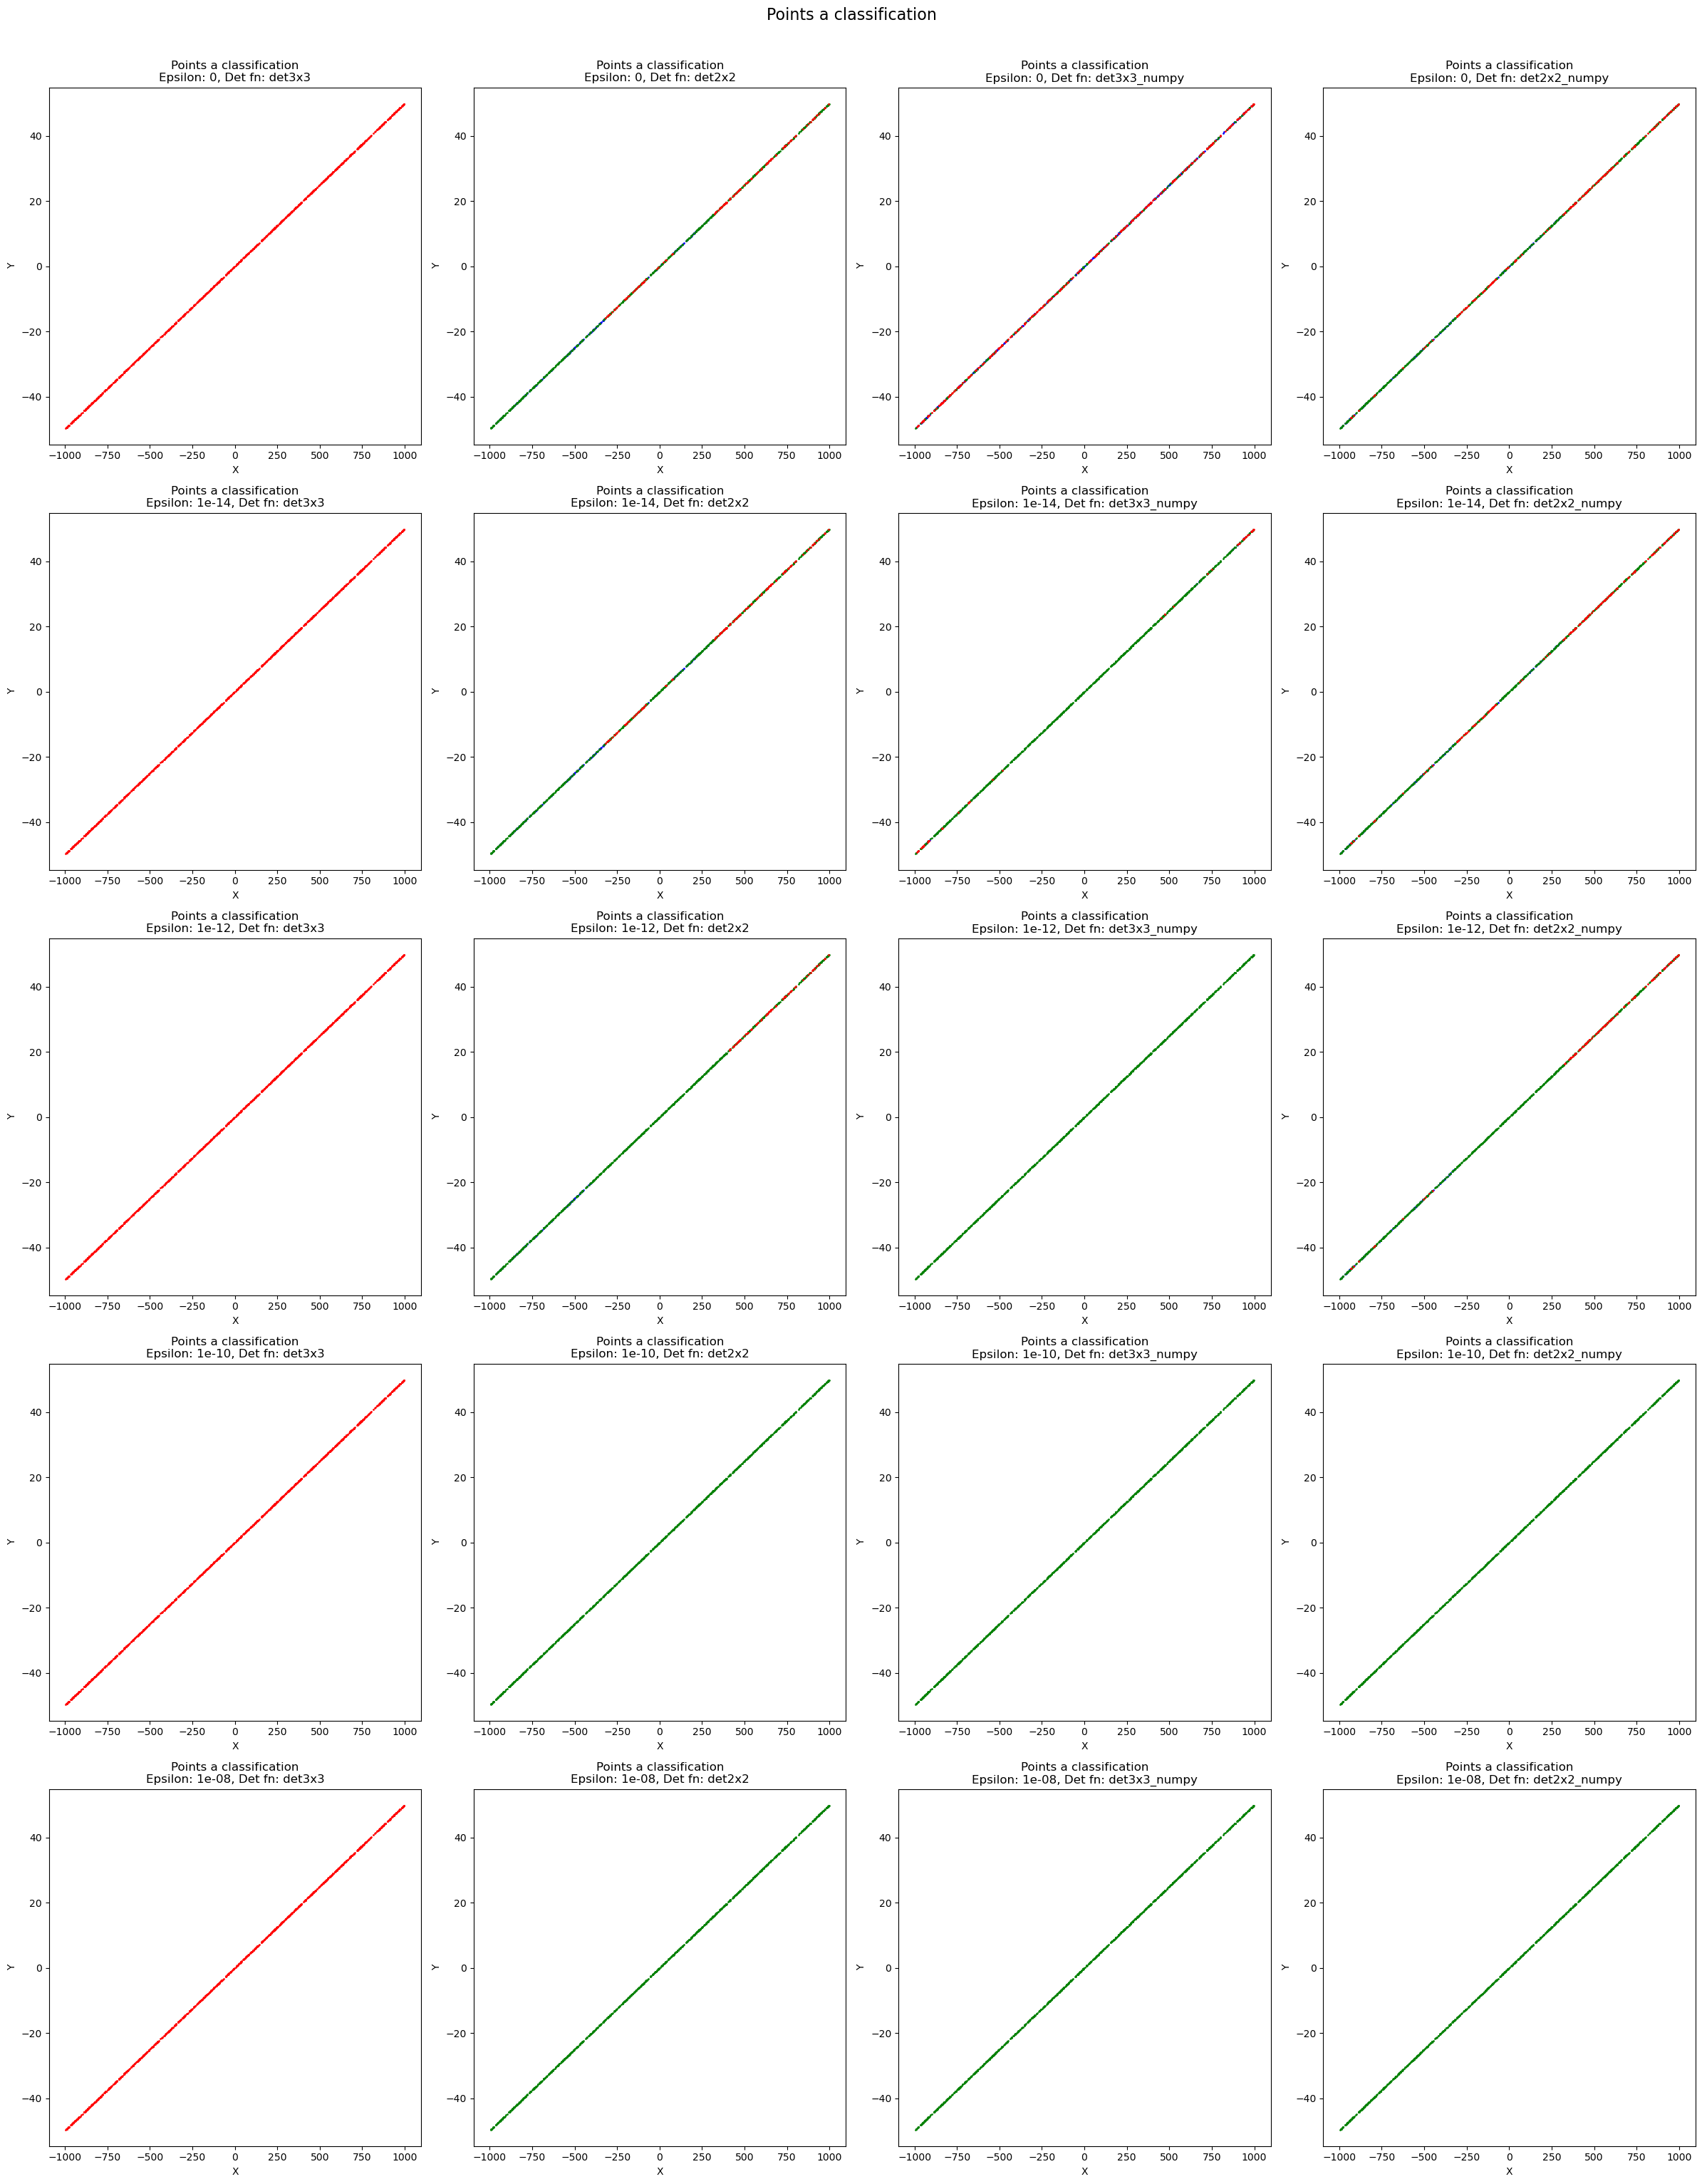

In [16]:
draw_all(point_a, point_b, points_d, epsilons=epsilons, det_fns=det_fns, 
         title="Points a classification", collinear_size=1)